## 6. (Repeat adjusting until satisfied)

In [1]:
# Import modules
import os
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pathlib
import numpy as np

In [2]:
# Import keras layres modules
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, SpatialDropout2D, Flatten, Dense, Activation

### Data preprocessing and augmentation

In [3]:
os.getcwd()

'D:\\PYTHON\\UdemyTensorFlow'

In [4]:
os.chdir('D:/PYTHON/UdemyTensorFlow')

In [5]:
os.getcwd()

'D:\\PYTHON\\UdemyTensorFlow'

In [6]:
# Define paths to data
train_dir = 'data/10_food_classes/train/'
test_dir = 'data/10_food_classes/test/'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# Create augmented and not augmented train datasets

# Create data generators
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=.2,
                                   shear_range=.2,
                                   zoom_range=.2,
                                   height_shift_range=.3,
                                   horizontal_flip=True
                                  )

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

# Create batch flow from directories
train_data_aug = train_datagen_aug.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              batch_size=32)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode='categorical',
                                            batch_size=32)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a model with learning rate callback

In [9]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [10]:
# Create a scheduler
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20) ,verbose=1)

In [11]:
# Create a model
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.35),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation('relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [12]:
# Fit the model with LearningRateScheduler callback
history_8 = model_8.fit(
    train_data_aug, epochs=30, steps_per_epoch=len(train_data_aug),
    validation_data=test_data, validation_steps=len(test_data),
    callbacks=[lr_scheduler]
)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
Epoch 1/30
235/235 [==============================] - 358s 2s/step - loss: 2.3011 - accuracy: 0.1193 - val_loss: 2.2334 - val_accuracy: 0.2028

Epoch 00002: LearningRateScheduler reducing learning rate to 0.00011220184543019634.
Epoch 2/30
235/235 [==============================] - 228s 972ms/step - loss: 2.2331 - accuracy: 0.1689 - val_loss: 2.1190 - val_accuracy: 0.2532

Epoch 00003: LearningRateScheduler reducing learning rate to 0.00012589254117941674.
Epoch 3/30
235/235 [==============================] - 166s 708ms/step - loss: 2.1781 - accuracy: 0.2045 - val_loss: 2.0627 - val_accuracy: 0.2876

Epoch 00004: LearningRateScheduler reducing learning rate to 0.00014125375446227543.
Epoch 4/30
235/235 [==============================] - 174s 739ms/step - loss: 2.1641 - accuracy: 0.2180 - val_loss: 2.0308 - val_accuracy: 0.2800

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00015848931924611136.
Epoch

In [20]:
# import pandas 
import pandas as pd

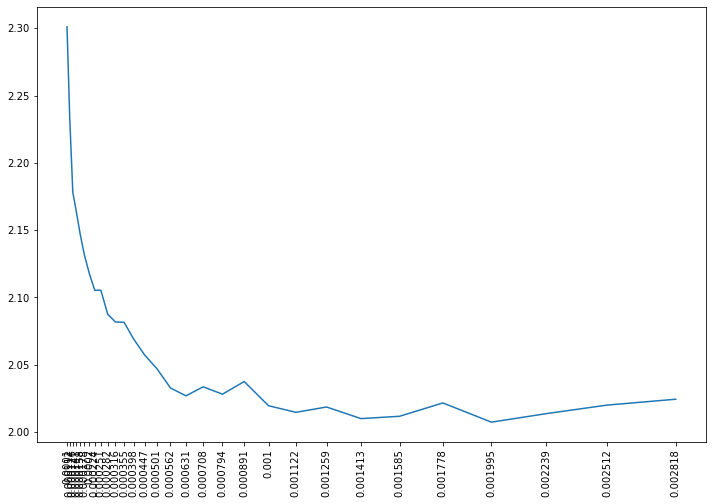

In [15]:
# Make a data frame from a dictionary
history_8_df = pd.DataFrame(history_8.history)

# Visualize loss and learning rate
plt.figure(figsize=(12,8))
plt.xticks(ticks=[round(i, 6) for i in history_8_df.lr.tolist()], labels=[round(i, 6) for i in history_8_df.lr.tolist()], rotation=90)
plt.plot(history_8_df.lr, history_8_df.loss)

In [11]:
# We set learning rate:
lr = 0.0005

In [33]:
# Plot validation and training curves separately
def plot_the_curves(history):
    '''
    Returns separate loss curves for training and validation data
    '''
    # Obtain loss from history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Obtain accuracy from history
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Obtain number of epochs
    epochs = range(len(history.history['loss']))
    
    # Setup the figure
    plt.figure(figsize=(24, 6))
    plt.suptitle(f'Model {history.model.name} metrics', fontsize='x-large')
    
    # Plot loss
    plt.subplot(1, 2, 1)
    ax1 = plt.plot(epochs, loss, label='Training Loss')
    ax1 = plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss Curves')
                  
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy Curves')

In [17]:
# Create a model
model_8_1 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.35),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation('relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_8_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [18]:
# Fit the model
history_8_1 = model_8_1.fit(
    train_data_aug, epochs=10, steps_per_epoch=len(train_data_aug),
    validation_data=test_data, validation_steps=len(test_data)
)

Epoch 1/10
235/235 [==============================] - 162s 689ms/step - loss: 2.3030 - accuracy: 0.1352 - val_loss: 2.1603 - val_accuracy: 0.2124
Epoch 2/10
235/235 [==============================] - 192s 816ms/step - loss: 2.2230 - accuracy: 0.1775 - val_loss: 2.1182 - val_accuracy: 0.2568
Epoch 3/10
235/235 [==============================] - 242s 1s/step - loss: 2.1814 - accuracy: 0.2024 - val_loss: 2.0691 - val_accuracy: 0.2764
Epoch 4/10
235/235 [==============================] - 175s 745ms/step - loss: 2.1505 - accuracy: 0.2228 - val_loss: 2.0101 - val_accuracy: 0.2788
Epoch 5/10
235/235 [==============================] - 164s 699ms/step - loss: 2.1225 - accuracy: 0.2404 - val_loss: 1.9519 - val_accuracy: 0.3308
Epoch 6/10
235/235 [==============================] - 163s 692ms/step - loss: 2.0984 - accuracy: 0.2536 - val_loss: 1.9465 - val_accuracy: 0.3276
Epoch 7/10
235/235 [==============================] - 164s 700ms/step - loss: 2.0763 - accuracy: 0.2613 - val_loss: 1.9187 - va

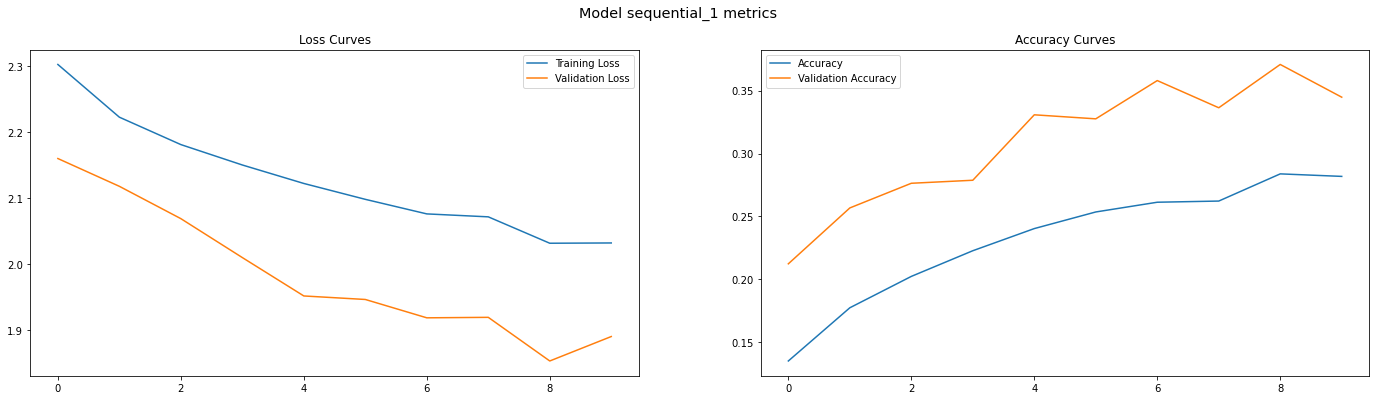

In [20]:
plot_the_curves(history_8_1)

In [21]:
model_8_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
activation_2 (Activation)    (None, 222, 222, 10)      0         
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 222, 222, 10)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
activation_3 (Activation)    (None, 109, 109, 10)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)       

In [12]:
# Create a model
model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.35),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation('relu'),
    Conv2D(10,3),
    Activation('relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [13]:
# Fit the model
history_9 = model_9.fit(
    train_data_aug, epochs=10, steps_per_epoch=len(train_data_aug),
    validation_data=test_data, validation_steps=len(test_data)
)

Epoch 1/10
235/235 [==============================] - 187s 798ms/step - loss: 2.2617 - accuracy: 0.1467 - val_loss: 2.1673 - val_accuracy: 0.2172
Epoch 2/10
235/235 [==============================] - 179s 761ms/step - loss: 2.1742 - accuracy: 0.2075 - val_loss: 2.0373 - val_accuracy: 0.2576
Epoch 3/10
235/235 [==============================] - 170s 725ms/step - loss: 2.1391 - accuracy: 0.2275 - val_loss: 2.0136 - val_accuracy: 0.2760
Epoch 4/10
235/235 [==============================] - 179s 760ms/step - loss: 2.1105 - accuracy: 0.2411 - val_loss: 1.9933 - val_accuracy: 0.2960
Epoch 5/10
235/235 [==============================] - 166s 706ms/step - loss: 2.0850 - accuracy: 0.2564 - val_loss: 1.9581 - val_accuracy: 0.3032
Epoch 6/10
235/235 [==============================] - 180s 766ms/step - loss: 2.0596 - accuracy: 0.2633 - val_loss: 1.9437 - val_accuracy: 0.3204
Epoch 7/10
235/235 [==============================] - 241s 1s/step - loss: 2.0492 - accuracy: 0.2744 - val_loss: 1.9339 - va

In [14]:
model_9.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 222, 222, 10)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 10)      9

In [17]:
# Create a model
model_9_1 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation('relu'),
    Conv2D(10,3),
    Activation('relu'),
    SpatialDropout2D(0.35),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_9_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [18]:
# Fit the model
history_9_1 = model_9_1.fit(
    train_data_aug, epochs=10, steps_per_epoch=len(train_data_aug),
    validation_data=test_data, validation_steps=len(test_data)
)

Epoch 1/10
235/235 [==============================] - 165s 700ms/step - loss: 2.2454 - accuracy: 0.1639 - val_loss: 2.1080 - val_accuracy: 0.2480
Epoch 2/10
235/235 [==============================] - 170s 725ms/step - loss: 2.1660 - accuracy: 0.2165 - val_loss: 2.0159 - val_accuracy: 0.3152
Epoch 3/10
235/235 [==============================] - 174s 739ms/step - loss: 2.1338 - accuracy: 0.2316 - val_loss: 1.9915 - val_accuracy: 0.3144
Epoch 4/10
235/235 [==============================] - 169s 717ms/step - loss: 2.1249 - accuracy: 0.2333 - val_loss: 1.9750 - val_accuracy: 0.3208
Epoch 5/10
235/235 [==============================] - 171s 728ms/step - loss: 2.0913 - accuracy: 0.2575 - val_loss: 1.9708 - val_accuracy: 0.3228
Epoch 6/10
235/235 [==============================] - 163s 693ms/step - loss: 2.0985 - accuracy: 0.2533 - val_loss: 1.9393 - val_accuracy: 0.3468
Epoch 7/10
235/235 [==============================] - 168s 716ms/step - loss: 2.0966 - accuracy: 0.2507 - val_loss: 1.9854 -

<AxesSubplot:>

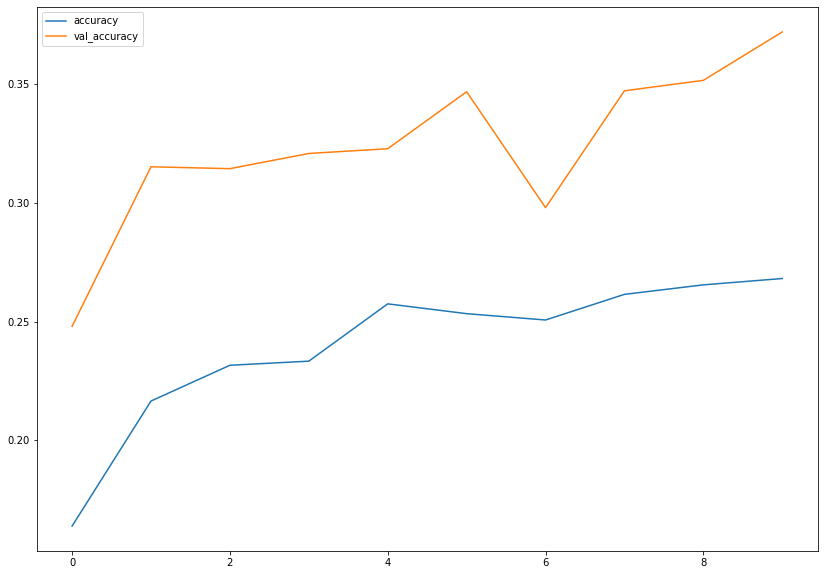

In [25]:
pd.DataFrame(history_9_1.history)[['accuracy', 'val_accuracy']].plot(figsize=(14,10))

<AxesSubplot:>

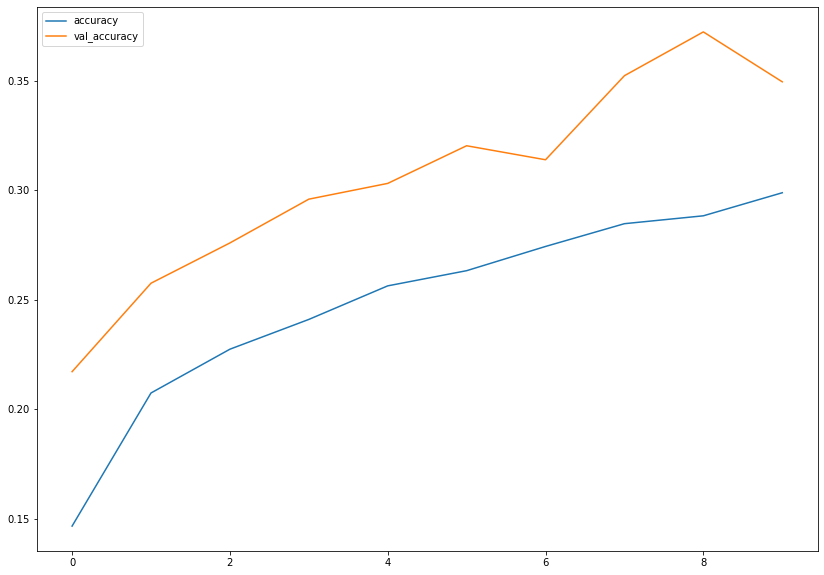

In [24]:
pd.DataFrame(history_9.history)[['accuracy', 'val_accuracy']].plot(figsize=(14,10))

NameError: name 'history_8' is not defined

In [28]:
# Create a model like LeNet-5 implementation: https://medium.com/analytics-vidhya/dense-or-convolutional-part-1-c75c59c5b4ad
model_10 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.35),
    MaxPool2D(),
    Conv2D(10,3),
    Activation('relu'),
    MaxPool2D(),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [29]:
# Fit the model
history_10 = model_10.fit(
    train_data_aug, epochs=10, steps_per_epoch=len(train_data_aug),
    validation_data=test_data, validation_steps=len(test_data)
)

Epoch 1/10
235/235 [==============================] - 300s 1s/step - loss: 2.3338 - accuracy: 0.1192 - val_loss: 2.2569 - val_accuracy: 0.1552
Epoch 2/10
235/235 [==============================] - 252s 1s/step - loss: 2.2315 - accuracy: 0.1649 - val_loss: 2.1417 - val_accuracy: 0.2016
Epoch 3/10
235/235 [==============================] - 202s 861ms/step - loss: 2.1793 - accuracy: 0.2031 - val_loss: 2.0853 - val_accuracy: 0.2524
Epoch 4/10
235/235 [==============================] - 203s 866ms/step - loss: 2.1505 - accuracy: 0.2175 - val_loss: 2.0403 - val_accuracy: 0.2800
Epoch 5/10
235/235 [==============================] - 191s 815ms/step - loss: 2.1273 - accuracy: 0.2275 - val_loss: 2.0289 - val_accuracy: 0.2688
Epoch 6/10
235/235 [==============================] - 186s 789ms/step - loss: 2.0970 - accuracy: 0.2513 - val_loss: 1.9657 - val_accuracy: 0.3124
Epoch 7/10
235/235 [==============================] - 174s 739ms/step - loss: 2.0949 - accuracy: 0.2491 - val_loss: 1.9705 - val_a

<AxesSubplot:>

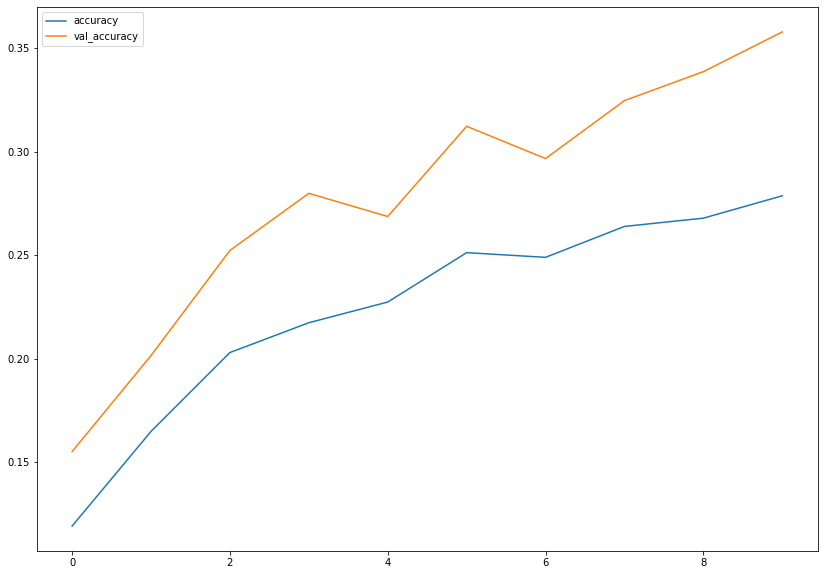

In [30]:
pd.DataFrame(history_10.history)[['accuracy', 'val_accuracy']].plot(figsize=(14,10))

In [31]:
# Create a model like LeNet-5 implementation: https://medium.com/analytics-vidhya/dense-or-convolutional-part-1-c75c59c5b4ad
model_10_1 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.35),
    MaxPool2D(),
    Conv2D(10,3),
    Activation('relu'),
    MaxPool2D(),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_10_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [32]:
# Fit the model
history_10_1 = model_10_1.fit(
    train_data_aug, epochs=30, steps_per_epoch=len(train_data_aug),
    validation_data=test_data, validation_steps=len(test_data)
)

Epoch 1/30
235/235 [==============================] - 304s 1s/step - loss: 2.3097 - accuracy: 0.1263 - val_loss: 2.2267 - val_accuracy: 0.1888
Epoch 2/30
235/235 [==============================] - 204s 866ms/step - loss: 2.2179 - accuracy: 0.1781 - val_loss: 2.1216 - val_accuracy: 0.2232
Epoch 3/30
235/235 [==============================] - 191s 815ms/step - loss: 2.1643 - accuracy: 0.2037 - val_loss: 2.0220 - val_accuracy: 0.2932
Epoch 4/30
235/235 [==============================] - 191s 814ms/step - loss: 2.1360 - accuracy: 0.2248 - val_loss: 1.9991 - val_accuracy: 0.3072
Epoch 5/30
235/235 [==============================] - 193s 822ms/step - loss: 2.1017 - accuracy: 0.2439 - val_loss: 1.9750 - val_accuracy: 0.3156
Epoch 6/30
235/235 [==============================] - 193s 822ms/step - loss: 2.0932 - accuracy: 0.2481 - val_loss: 1.9523 - val_accuracy: 0.3156
Epoch 7/30
235/235 [==============================] - 193s 821ms/step - loss: 2.0851 - accuracy: 0.2540 - val_loss: 1.9484 - va

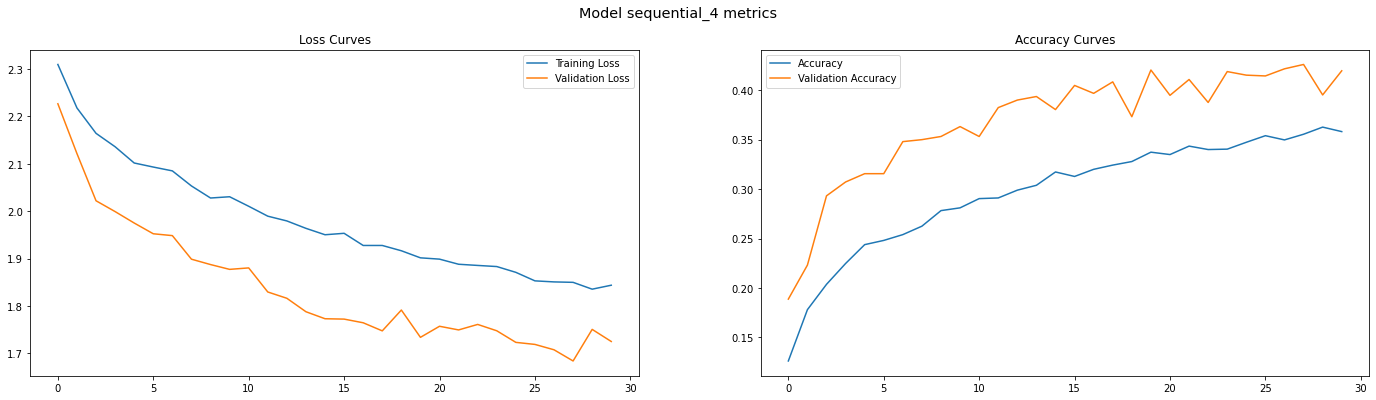

In [35]:
plot_the_curves(history_10_1)